In [1]:
import pandas as pd 
import numpy as np

In [2]:
def mm_to_phi(d):
    """this function converts an array/list of grain seive sizes in mm to phi scale and returns the phi reading for sedimentological analysis"""
    import math
    phi=[]
    for i in d:
       phi.append(round(-(math.log2(i)/math.log2(2)),2))
    
    return phi

In [3]:
gr_sieve_size= np.array([2,1.18,.85,.425,.300,.150,.075,.063],dtype='float64')
phi=mm_to_phi(gr_sieve_size)

In [4]:
phi

[-1.0, -0.24, 0.23, 1.23, 1.74, 2.74, 3.74, 3.99]

In [5]:
import seaborn as sns 

In [6]:
def bed_to_100(x):
    """This is used to scale beds that are less than 100 in total weight to 100"""
    
    bed =[]
    total=sum(x)
    for i in x:
        bed.append(round(((i/total) *100),2))
    return bed

In [7]:

#Beds for Uturu outcrop

bed_A= [2.6,12.4,17.4,41.1,9.9,10,4.2,1]
# bed_A=np.array(bed_A)
bed_B=[1.6,6.3,11.5,39.4,21.3,14.5,3.4,0.6]

bed_D=[7.5,15.4,12.5,28.5,15,15.1,3.6,1.0]

bed_E=[0.8,3.5,7.5,37.9,26.3,18.1,3.7,1.1]


bed_G=[3.9,9.4,10.4,35.4,23.1,14.2,24,.3]

bed_H= [0.6,4.0,8.0,45.9,25.4,11.4,4.4,0.4]

In [8]:
uturu_bed_A=bed_to_100(bed_A)
uturu_bed_B=bed_to_100(bed_B)
uturu_bed_D=bed_to_100(bed_D)
uturu_bed_E=bed_to_100(bed_E)
uturu_bed_G=bed_to_100(bed_G)
uturu_bed_H=bed_to_100(bed_H)



uturu_bed_A,uturu_bed_B,uturu_bed_D,uturu_bed_E,uturu_bed_G,uturu_bed_H

([2.64, 12.58, 17.65, 41.68, 10.04, 10.14, 4.26, 1.01],
 [1.62, 6.39, 11.66, 39.96, 21.6, 14.71, 3.45, 0.61],
 [7.61, 15.62, 12.68, 28.9, 15.21, 15.31, 3.65, 1.01],
 [0.81, 3.54, 7.58, 38.32, 26.59, 18.3, 3.74, 1.11],
 [3.23, 7.79, 8.62, 29.33, 19.14, 11.76, 19.88, 0.25],
 [0.6, 4.0, 7.99, 45.85, 25.37, 11.39, 4.4, 0.4])

In [9]:
bed_B=[1.6,6.3,11.5,39.4,21.3,14.5,3.4,0.6]
uturu_bed_B=bed_to_100(bed_B)

In [10]:
def cummulate_bed(bed):
    """this function returns the cummulative score of an array (0-100)"""
    from itertools import accumulate
   
    cum_beds=[]
    
    cum_bed=list(accumulate(bed))
    for i in cum_bed:
        cum_beds.append(round(i,2))
    return cum_beds

In [11]:
uturu_cum_bed_A=cummulate_bed(uturu_bed_A)
uturu_cum_bed_B=cummulate_bed(uturu_bed_B)
uturu_cum_bed_D=cummulate_bed(uturu_bed_D)
uturu_cum_bed_E=cummulate_bed(uturu_bed_E)
uturu_cum_bed_G=cummulate_bed(uturu_bed_G)
uturu_cum_bed_H=cummulate_bed(uturu_bed_H)


uturu_cum_bed_H

[0.6, 4.6, 12.59, 58.44, 83.81, 95.2, 99.6, 100.0]

In [12]:
import matplotlib.pyplot as plt

from matplotlib import style


style.use('ggplot')

In [13]:
phi

[-1.0, -0.24, 0.23, 1.23, 1.74, 2.74, 3.74, 3.99]

In [14]:
import math

In [15]:
np.percentile(uturu_cum_bed_A,50)

79.57

In [16]:
def percentiles(bed_data):
    """
    This get the percentile for the data passed. 
    it returns  a dataframe of the percentage passing,percentile of the data
    and the bed_data.
    """
    sed_percentile=[]
    bed=bed_data
   
    sed_passing=[]
    
    sedi_passing=[5,16,25,50,75,84,95,99.9]
    for i in sedi_passing:
        sed_percentile.append(round(np.percentile(bed_data,i),2))
    
#     sedi_passing=[5,25,50,75,84,95]
    for i in sedi_passing:
        x=str(i)
        sed_passing.append(x +'%')
    percentiles= dict(zip(sed_passing,sed_percentile))
   
    return sed_percentile,sed_passing,percentiles

In [17]:
def Data_Frame(q,phi,bed_data):
    """
    Passing the dictionary, from the percentile function, 
    the phi scale list/array.
    the bed_data.
    """
    sedi_passing=[5,16,25,50,75,84,95,99.9]
    x=[]

    for i in sedi_passing:
        x.append(round(np.percentile(phi,i),2))
    

    Outcrop_Bed_data= dict(zip(phi,bed_data))
    Outcrop_Bed= pd.DataFrame(Outcrop_Bed_data.items(), columns= ['Phi_scale','Bed_thickness'])
    
    percentile_table=pd.DataFrame(q.items(),columns=['Percentiles','Percentile_Passings' ])
    
    
    Out=Outcrop_Bed.join(percentile_table)
    Out['Phi_percentile']=x
    
    return Out

In [18]:
x1,z1,q1=percentiles(uturu_cum_bed_H)
x2,z2,q2=percentiles(uturu_cum_bed_G)
x3,z3,q3=percentiles(uturu_cum_bed_E)
x4,z4,q4=percentiles(uturu_cum_bed_D)
x5,z5,q5=percentiles(uturu_cum_bed_B)
x6,z6,q6=percentiles(uturu_cum_bed_A)

In [19]:
bed_A= Data_Frame(q6,phi,uturu_cum_bed_A)
bed_B= Data_Frame(q5,phi,uturu_cum_bed_B)
bed_D= Data_Frame(q4,phi,uturu_cum_bed_D)
bed_E= Data_Frame(q3,phi,uturu_cum_bed_E)
bed_G= Data_Frame(q2,phi,uturu_cum_bed_G)
bed_H= Data_Frame(q1,phi,uturu_cum_bed_H)

In [20]:
#Techincal COllege


bed_C= [2.3,5.6,7.7,21.0,13.5,35.9,12,1.6]
bed_E = [10.8,21.8,16.4,36.7,3.9,6.3,1.2,0]
bed_G = [3.9,10.1,9.3,35.4,23.2,15.3,2.4,0.3]

In [21]:
Tech_coll_C=bed_to_100(bed_C)
Tech_coll_E=bed_to_100(bed_E)
Tech_coll_G=bed_to_100(bed_G)


In [22]:
Tech_coll_C=cummulate_bed(Tech_coll_C)
Tech_coll_E=cummulate_bed(Tech_coll_E)
Tech_coll_G=cummulate_bed(Tech_coll_G)

In [23]:
x2,z2,q2=percentiles(Tech_coll_G)
x3,z3,q3=percentiles(Tech_coll_E)
x4,z4,q4=percentiles(Tech_coll_C)

In [24]:
bed_C= Data_Frame(q4,phi,Tech_coll_C)
bed_E= Data_Frame(q3,phi,Tech_coll_E)
bed_G= Data_Frame(q2,phi,Tech_coll_G)

In [25]:
cum_curve(bed_C,percentile_th,'Tecnical-College-Bed-D')
cum_curve(bed_E,percentile_th,'Tecnical-College-Bed-E')
cum_curve(bed_G,percentile_th,'Tecnical-College-Bed-G')

NameError: name 'cum_curve' is not defined

In [ ]:
#Amasiri Sandstone 



bed_A=[0.6,10.9,23.8,48,8.9,4.3,1.2,0.1]
bed_B=[8.7,15.3,21.3,39.6,5.9,1.7,1.6,0.9]
bed_C=[4.1,14.0,17.8,44.1,12.6,5.2,1.1,0.2]
bed_D=[3.6,12.0,13.6,39.3,15.1,9.0,3.9,1.3]

In [ ]:
Amasiri_A=bed_to_100(bed_A)
Amasiri_B=bed_to_100(bed_B)
Amasiri_C=bed_to_100(bed_C)
Amasiri_D=bed_to_100(bed_D)

In [ ]:
Amasiri_A=cummulate_bed(Amasiri_A)
Amasiri_B=cummulate_bed(Amasiri_B)
Amasiri_C=cummulate_bed(Amasiri_C)
Amasiri_D=cummulate_bed(Amasiri_D)

In [ ]:
x2,z2,q2=percentiles(Amasiri_A)
x3,z3,q3=percentiles(Amasiri_B)
x4,z4,q4=percentiles(Amasiri_C)
x1,z1,q1=percentiles(Amasiri_D)


In [ ]:
bed_A= Data_Frame(q2,phi,Amasiri_A)
bed_B= Data_Frame(q3,phi,Amasiri_B)
bed_C= Data_Frame(q4,phi,Amasiri_C)
bed_D= Data_Frame(q1,phi,Amasiri_D)


In [ ]:
cum_curve(bed_A,percentile_th,'Amasiri-SandStone-Bed-A')
cum_curve(bed_B,percentile_th,'Amasiri-SandStone-Bed-B')
cum_curve(bed_C,percentile_th,'Amasiri-SandStone-Bed-C')
cum_curve(bed_D,percentile_th,'Amasiri-SandStone-Bed-D')

In [ ]:
bed_A

In [ ]:
bed_G

In [44]:
'''I used this block to test my logic before building the function'''





# percentat=[]

# per=[5,16,25,50,75,84,95,99]
# percentiles= [5,16,25,50,75,84,95,99]
# phi_t=[]



# for i in percentiles:
#     for j in per:
#         if i == j:
#             percentat.append(round(np.percentile(bed_df.Bed_thickness,i),2))
#             phi_t.append(round(np.percentile(bed_df.Phi_scale,i),2))
# print(phi_t)

# length_phi=[]
# for i in range(len(phi_t)):
#     length_phi.append(i)
    
# print(length_phi)
# if len(per) == 6:
#     fig,ax=plt.subplots(figsize=(10,8))
#     plt.plot(bed_df['Phi_scale'],bed_df['Bed_thickness'])
#     plt.plot(phi_t[0],percentat[0], marker='.', markersize=20, label= f'{per[0]}th Percentile')
#     plt.plot(phi_t[1],percentat[1], marker='.', markersize=20, label= f'{per[1]}th Percentile')
#     plt.plot(phi_t[2],percentat[2], marker='.', markersize=20, label= f'{per[2]}th Percentile')
#     plt.plot(phi_t[3],percentat[3], marker='.', markersize=20, label= f'{per[3]}th Percentile')
#     plt.plot(phi_t[4],percentat[4], marker='.', markersize=20, label= f'{per[4]}th Percentile')
#     plt.plot(phi_t[5],percentat[5], marker='.', markersize=20, label= f'{per[5]}th Percentile')
#     plt.xlabel('Phi Sieve Scale',fontsize=16)
#     plt.ylabel('Passings of Sample',fontsize=16)
#     plt.title('Cummulative Frequncy Curve',fontsize=20,fontweight='bold')
#     plt.legend(bbox_to_anchor=(1,1))
# elif len(per)==8:
#     fig,ax=plt.subplots(figsize=(10,8))
#     plt.plot(bed_df['Phi_scale'],bed_df['Bed_thickness'])
#     plt.plot(phi_t[0],percentat[0], marker='.', markersize=20, label= f'{per[0]}th Percentile')
#     plt.plot(phi_t[1],percentat[1], marker='.', markersize=20, label= f'{per[1]}th Percentile')
#     plt.plot(phi_t[2],percentat[2], marker='.', markersize=20, label= f'{per[2]}th Percentile')
#     plt.plot(phi_t[3],percentat[3], marker='.', markersize=20, label= f'{per[3]}th Percentile')
#     plt.plot(phi_t[4],percentat[4], marker='.', markersize=20, label= f'{per[4]}th Percentile')
#     plt.plot(phi_t[5],percentat[5], marker='.', markersize=20, label= f'{per[5]}th Percentile')
#     plt.plot(phi_t[6],percentat[6], marker='.', markersize=20, label= f'{per[6]}th Percentile')
#     plt.plot(phi_t[7],percentat[7], marker='.', markersize=20, label= f'{per[7]}th Percentile')
#     plt.xlabel('Phi Sieve Scale',fontsize=16)
#     plt.ylabel('Passings of Sample',fontsize=16)
#     plt.title('Cummulative Frequncy Curve',fontsize=20,fontweight='bold')
#     plt.legend(bbox_to_anchor=(1,1))

    

'I use this block to test my logic before building the function'

In [30]:
from matplotlib.ticker import AutoMinorLocator,FormatStrFormatter

In [43]:
def cum_curve(data,per,name_of_bed):
    '''This is a function that plots the cummulative curve and indicates percentile passing'''
    percentat=[] #creating a list for percentile based on the percentile that the user wants to plot.
    phi_t=[]#creating a list for the percentiles for the phi scale.
    percentiles= [5,16,25,50,75,84,95,99]

    for i in percentiles:
        for j in per:
            if i == j:
                percentat.append(round(np.percentile(data.Bed_thickness,i),2))
                phi_t.append(round(np.percentile(data.Phi_scale,i),2))
                
                
    #I feel this logic is not smart and flexible for the user. 
    #I could not loop through the dataframe to produce the plot so I had to use switch statements
    #I did not also try to take care of errors.
    
    
    
    if len(per) == 6:
        fig,ax=plt.subplots(figsize=(12,8))
        plt.plot(data['Phi_scale'],data['Bed_thickness'])
        plt.scatter(data['Phi_scale'],data['Bed_thickness'])
        plt.plot(phi_t[0],percentat[0], marker='.', markersize=20, label= f'{per[0]}th Percentile')
        plt.plot(phi_t[1],percentat[1], marker='.', markersize=20, label= f'{per[1]}th Percentile')
        plt.plot(phi_t[2],percentat[2], marker='.', markersize=20, label= f'{per[2]}th Percentile')
        plt.plot(phi_t[3],percentat[3], marker='.', markersize=20, label= f'{per[3]}th Percentile')
        plt.plot(phi_t[4],percentat[4], marker='.', markersize=20, label= f'{per[4]}th Percentile')
        plt.plot(phi_t[5],percentat[5], marker='.', markersize=20, label= f'{per[5]}th Percentile')

        ax.xaxis.set_minor_locator(AutoMinorLocator())
        ax.yaxis.set_minor_locator(AutoMinorLocator())
        ax.xaxis.set_minor_formatter(FormatStrFormatter("%.1f"))
        ax.yaxis.set_minor_formatter(FormatStrFormatter("%.0f"))
       

        plt.rc('grid', linestyle="-", color='black')
        ax.spines['bottom'].set_color('1.5')
        ax.spines['top'].set_color('1.5')
        ax.spines['right'].set_color('1.5')
        ax.spines['left'].set_color('1.5')
        plt.grid(True, which='minor', color='k', linestyle='-')
        plt.grid(True, which='major', color='k', linestyle='-')
        plt.xlabel('Phi Sieve Scale',fontsize=16)
        plt.ylabel('Passings of Sample',fontsize=16)
        plt.title(f'Cummulative Frequncy Curve {name_of_bed}',fontsize=20,fontweight='bold')
        plt.legend(bbox_to_anchor=(1,.8))
#         fig.savefig(f'{name_of_bed}.png',pdi=fig.dpi)
#         data.to_csv(f'{name_of_bed}.csv', index=False)
        
    
    
    
    elif len(per)==8:
        fig,ax=plt.subplots(figsize=(10,8))
        plt.plot(bed_df['Phi_scale'],bed_df['Bed_thickness'])
        plt.plot(phi_t[0],percentat[0], marker='.', markersize=20, label= f'{per[0]}th Percentile')
        plt.plot(phi_t[1],percentat[1], marker='.', markersize=20, label= f'{per[1]}th Percentile')
        plt.plot(phi_t[2],percentat[2], marker='.', markersize=20, label= f'{per[2]}th Percentile')
        plt.plot(phi_t[3],percentat[3], marker='.', markersize=20, label= f'{per[3]}th Percentile')
        plt.plot(phi_t[4],percentat[4], marker='.', markersize=20, label= f'{per[4]}th Percentile')
        plt.plot(phi_t[5],percentat[5], marker='.', markersize=20, label= f'{per[5]}th Percentile')
        plt.plot(phi_t[6],percentat[6], marker='.', markersize=20, label= f'{per[6]}th Percentile')
        plt.plot(phi_t[7],percentat[7], marker='.', markersize=20, label= f'{per[7]}th Percentile')
        ax.xaxis.set_minor_locator(AutoMinorLocator())
        ax.yaxis.set_minor_locator(AutoMinorLocator())
        ax.xaxis.set_minor_formatter(FormatStrFormatter("%.1f"))
        ax.yaxis.set_minor_formatter(FormatStrFormatter("%.0f"))
       

        plt.rc('grid', linestyle="-", color='black')
        ax.spines['bottom'].set_color('1.5')
        ax.spines['top'].set_color('1.5')
        ax.spines['right'].set_color('1.5')
        ax.spines['left'].set_color('1.5')
        plt.grid(True, which='minor', color='k', linestyle='-')
        plt.grid(True, which='major', color='k', linestyle='-')
        plt.xlabel('Phi Sieve Scale',fontsize=16)
        plt.ylabel('Passings of Sample',fontsize=16)
        plt.title(f'Cummulative Frequncy Curve {name_of_bed}',fontsize=20,fontweight='bold')
        plt.legend(bbox_to_anchor=(1,.8))
#         fig.savefig(f'{name_of_bed}.png',pdi=fig.dpi)
#         data.to_csv(f'{name_of_bed}.csv', index=False)
    

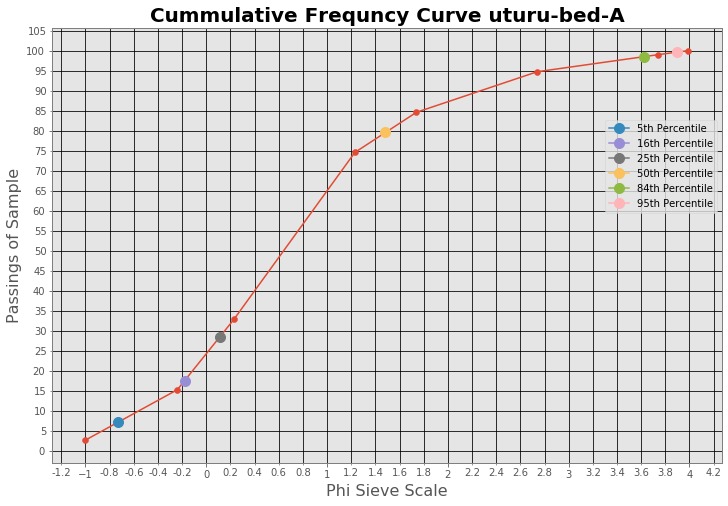

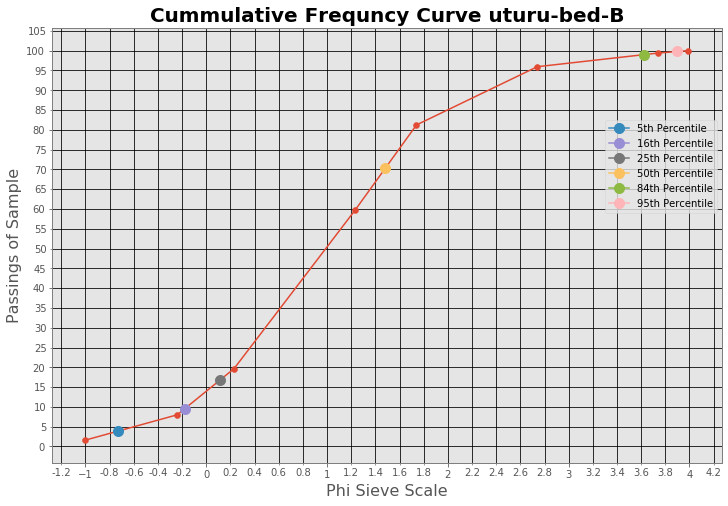

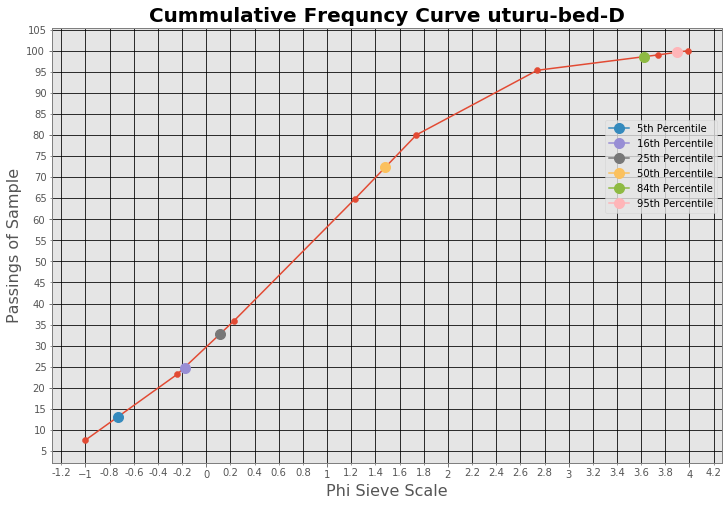

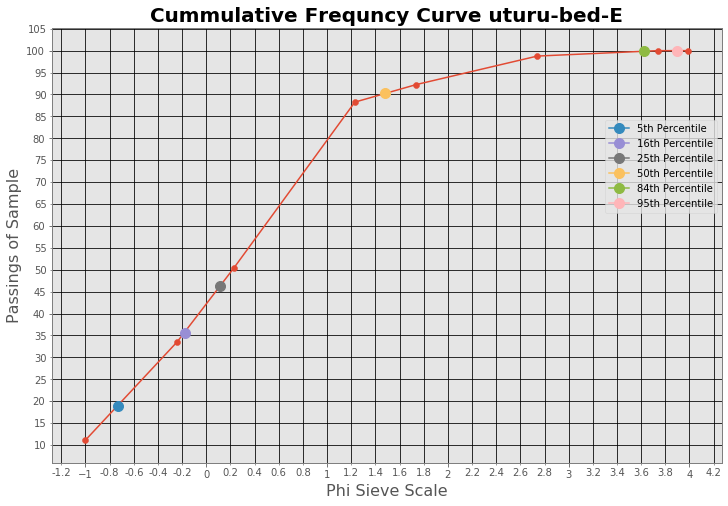

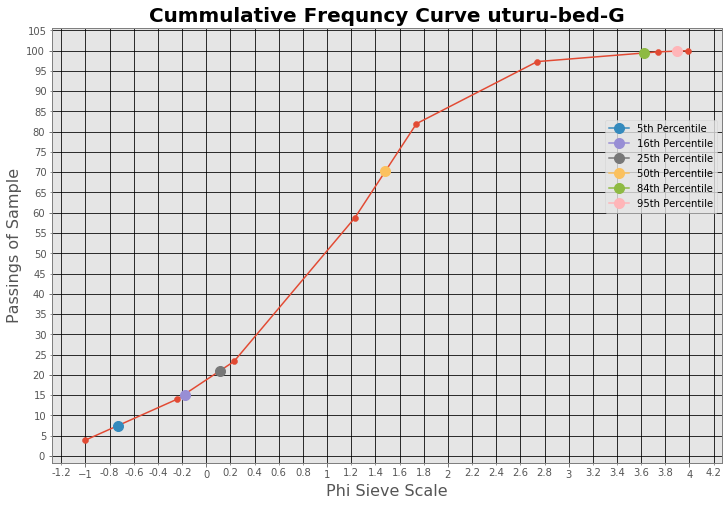

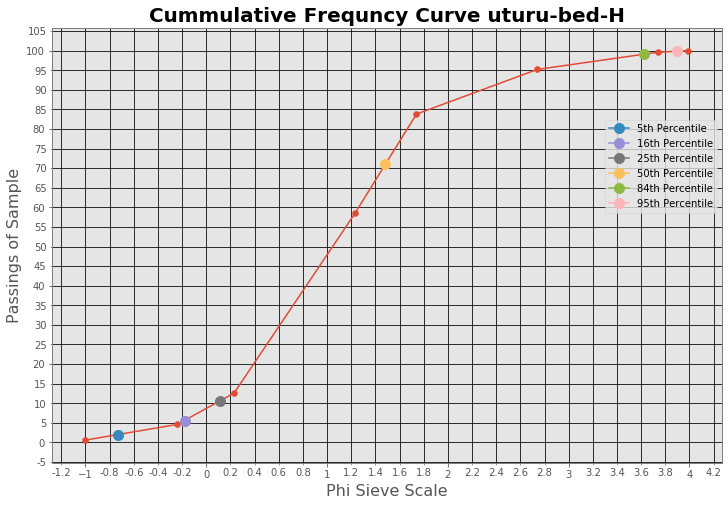

In [37]:
percentile_th=[5,16,25,50,84,95]


cum_curve(bed_A,percentile_th,'uturu-bed-A')
cum_curve(bed_B,percentile_th,'uturu-bed-B')
cum_curve(bed_D,percentile_th,'uturu-bed-D')
cum_curve(bed_E,percentile_th,'uturu-bed-E')
cum_curve(bed_G,percentile_th,'uturu-bed-G')
cum_curve(bed_H,percentile_th,'uturu-bed-H')

In [35]:
bed_B


,Phi_scale,Bed_thickness,Percentiles,Percentile_Passings,Phi_percentile
0,-1.00,1.62,5%,3.86,-0.73
1,-0.24,8.01,16%,9.41,-0.18
2,0.23,19.67,25%,16.76,0.11
3,1.23,59.63,50%,70.43,1.48
4,1.74,81.23,75%,96.80,2.99
5,2.74,95.94,84%,98.98,3.62
6,3.74,99.39,95%,99.79,3.90
7,3.99,100.00,99.9%,100.00,3.99


In [39]:
#TO create a function for navigating Working and create directories for the rocks 



import os 


def rock_sample_directory():
    print(os.getcwd())


In [ ]:
rock_sample_directory()

In [ ]:
# def rock_dir(name):
#     name=name
#     path= os.path.join(os.getcwd(),name)
#     if os.path.exists(path) & os.path.isdir(path):
#         print(path, ':exists and it is a directory')
#         os.chdir(path)
#         print(os.getcwd())
#     else:
#          os.mkdir(path)
#     os.chdir(path)
#     #changing working directory
#     print(os.getcwd())

In [ ]:
#new=rock_dir('Uturu_Sandstone')



In [ ]:
#rock_sample_directory()

In [40]:
bed= pd.read_csv('./Uturu_Sandstone/uturu-bed-H.csv')

bed

,Phi_scale,Bed_thickness,Percentiles,Percentile_Passings,Phi_percentile
0,-1.00,0.60,5%,2.00,-0.73
1,-0.24,4.60,16%,5.56,-0.18
2,0.23,12.59,25%,10.59,0.11
3,1.23,58.44,50%,71.12,1.48
4,1.74,83.81,75%,96.30,2.99
5,2.74,95.20,84%,99.07,3.62
6,3.74,99.60,95%,99.86,3.90
7,3.99,100.00,99.9%,100.00,3.99


In [ ]:
bed.describe()

In [ ]:
plt.plot()